In [1]:
import sys
sys.path.insert(0, "/Users/labo_dupe/Documents/GitHub/PyImage/utils/")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan, ShiftFit,FinalShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.io import export_png
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

In [2]:
targetdir = 'F:/Ozge/20190417_colorcorrected_croped/20190302'

Membraneimage = 'F:/Ozge/20190417_colorcorrected_croped/20190302/Ch1LineScan_C2-20190417_8x16TrackID1.tif'

Actinimage = 'F:/Ozge/20190417_colorcorrected_croped/20190302/Ch2LineScan_C2-20190417_8x16TrackID1.tif'



#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8


#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data_block'    
MakePath(save_dir)


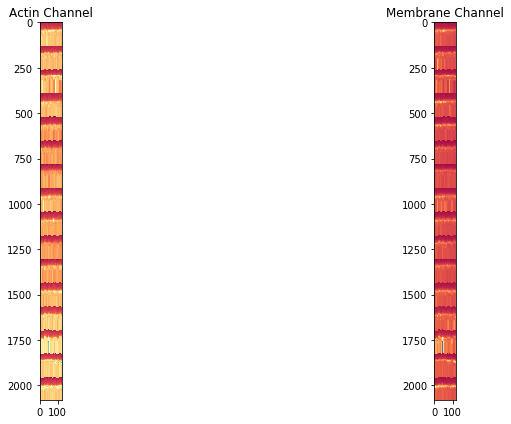

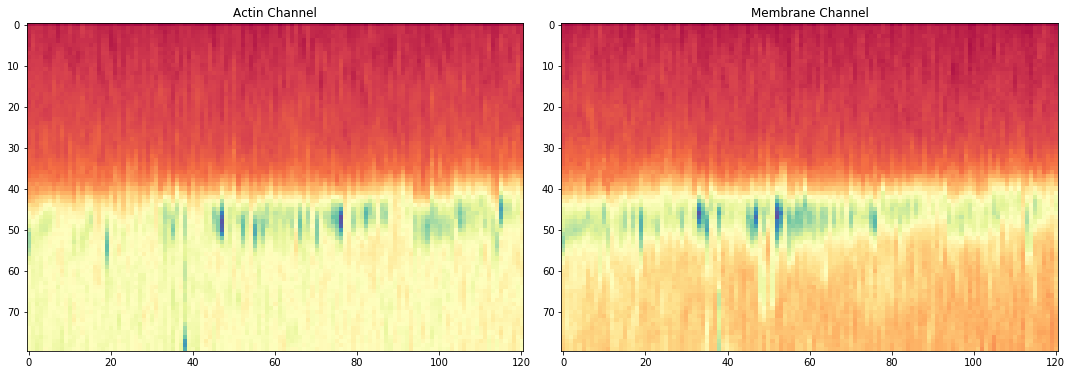

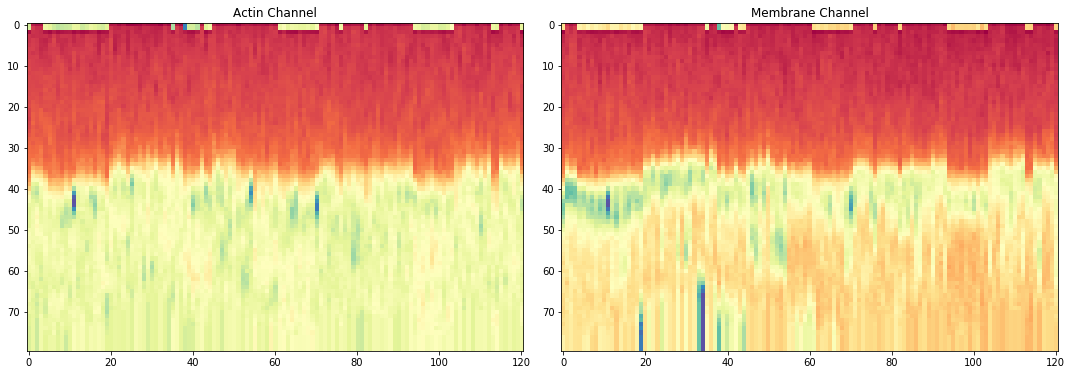

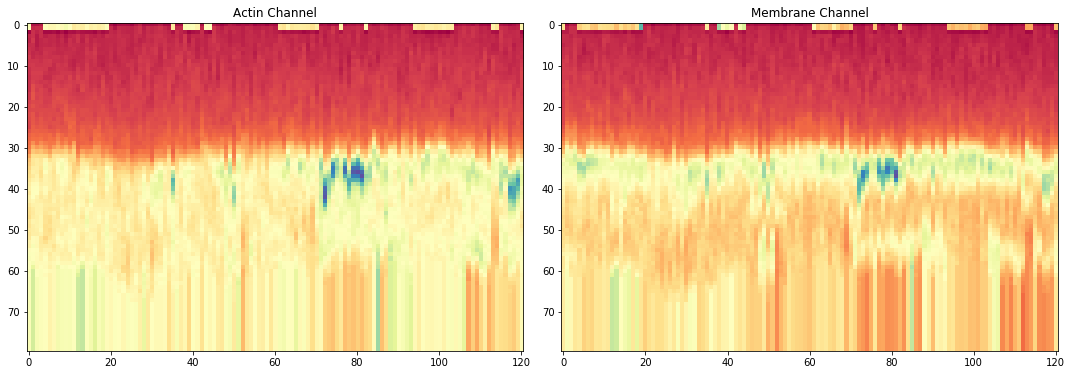

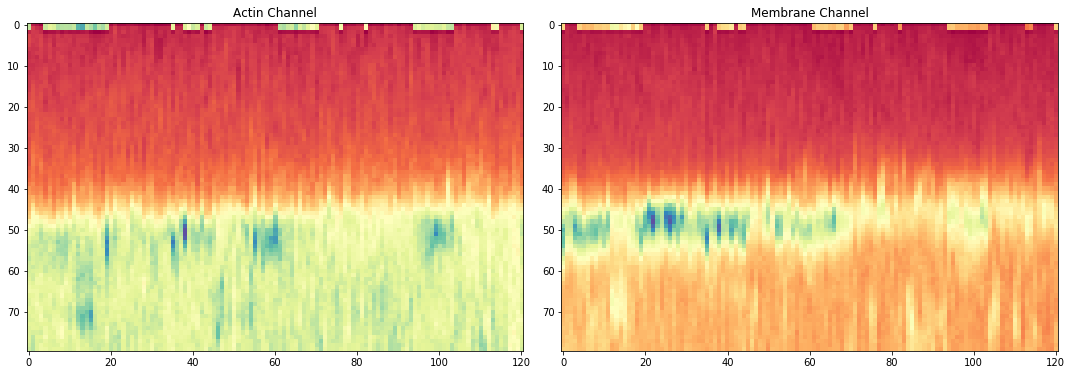

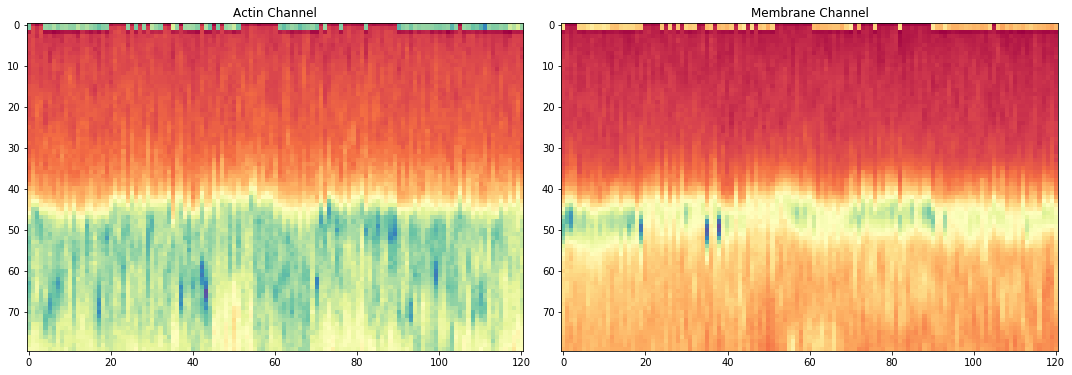

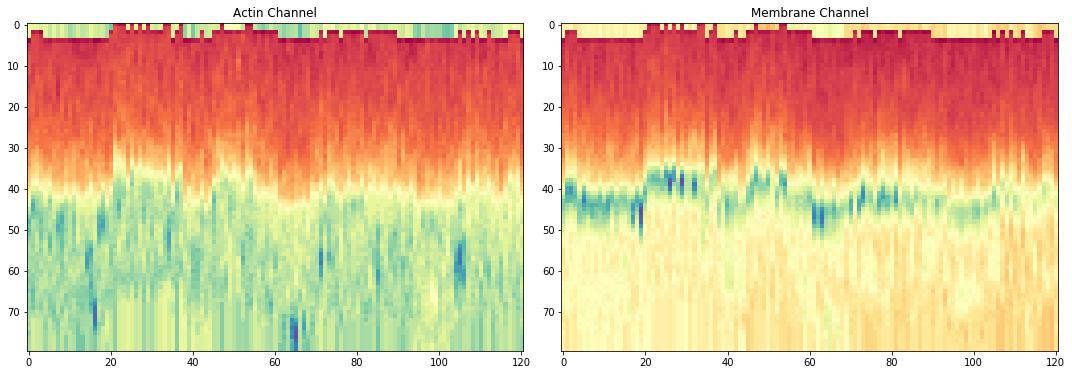

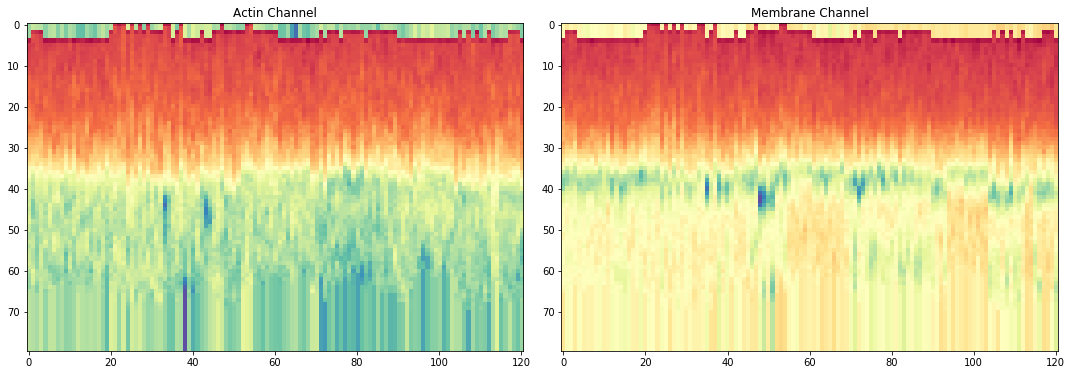

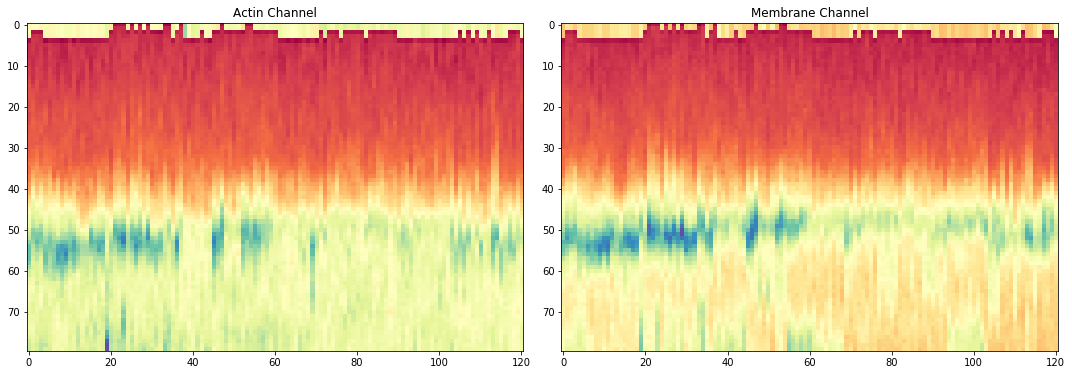

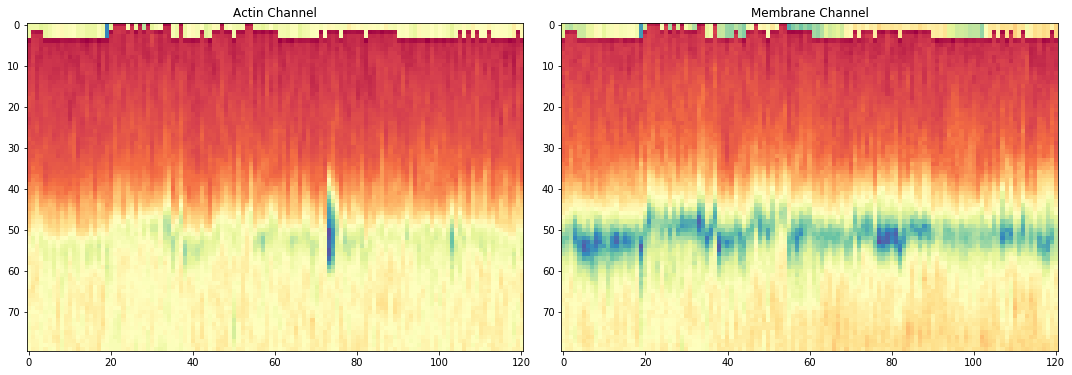

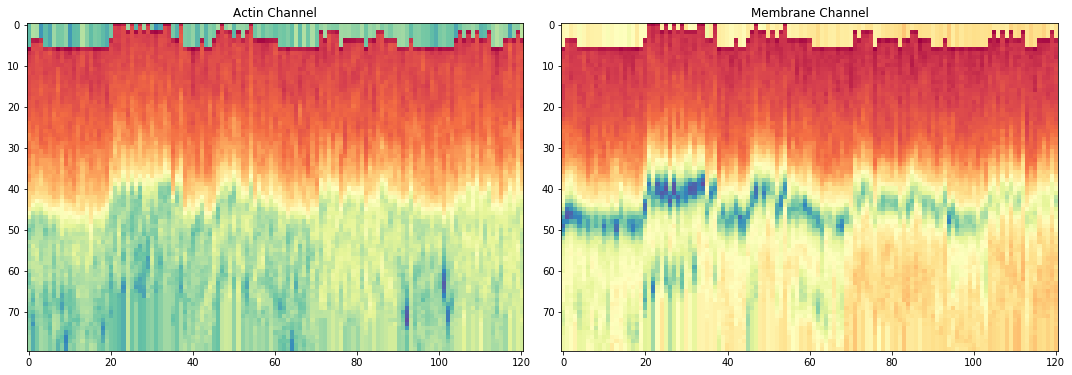

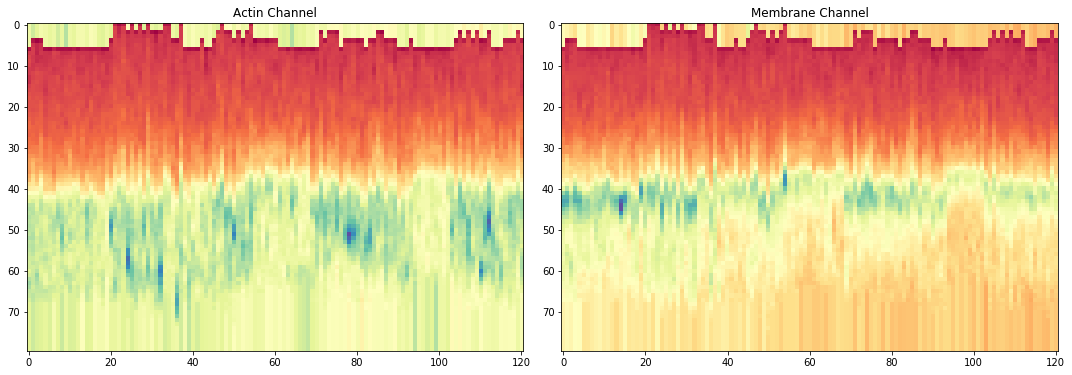

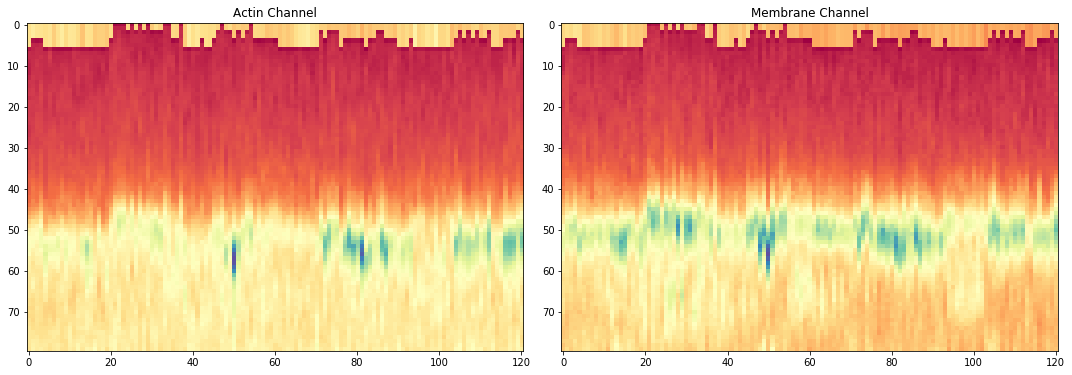

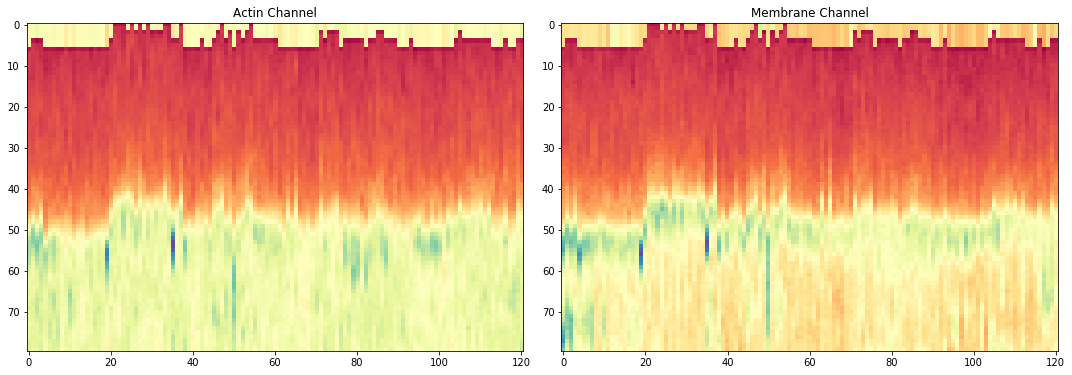

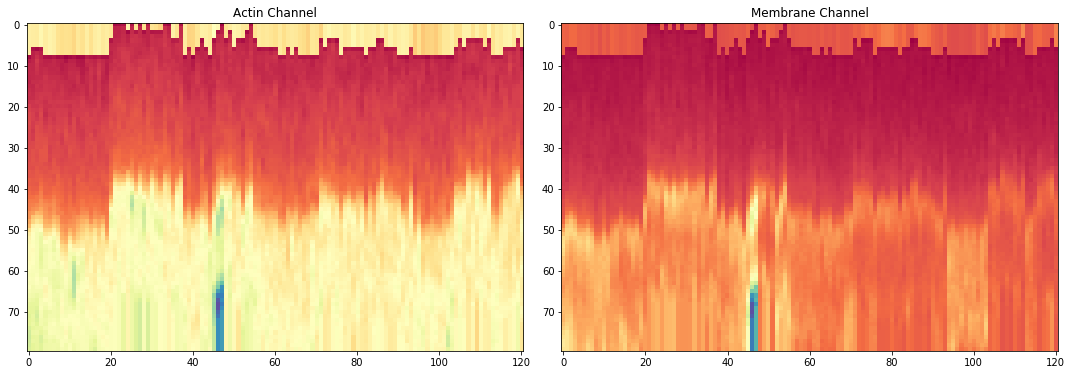

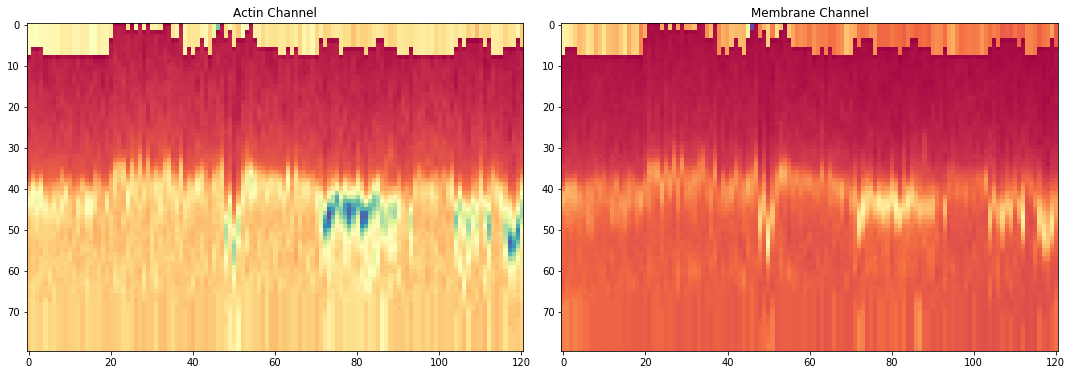

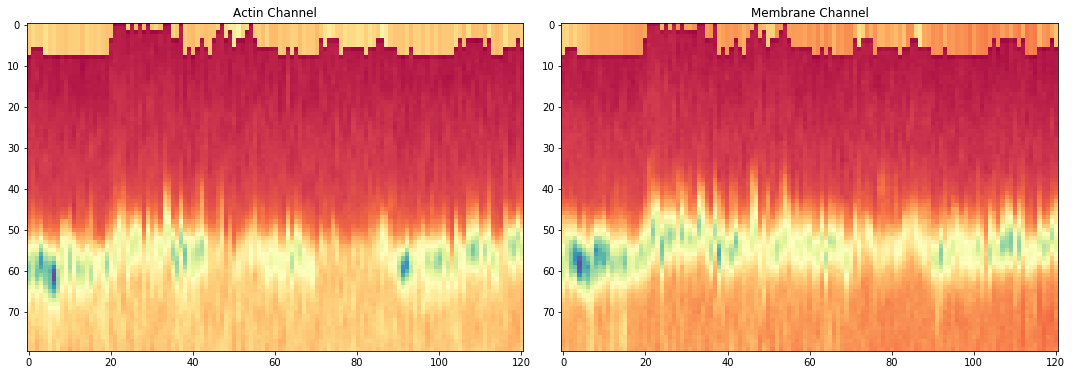

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


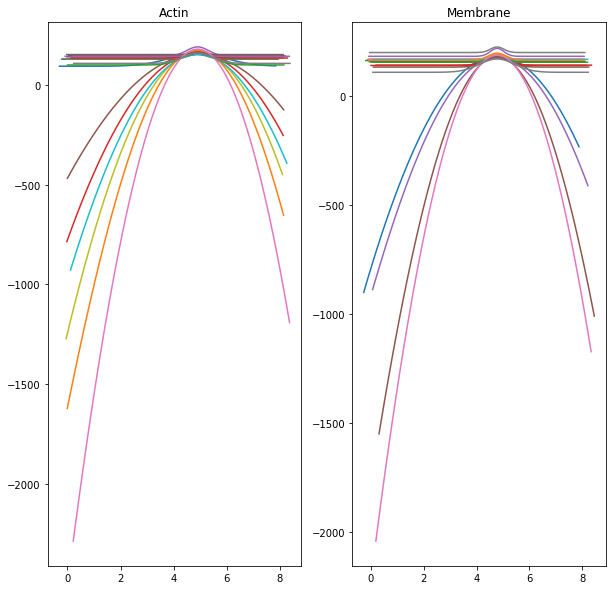

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 19.00009815   0.32411141   4.76013986 161.32225299]
Actin Fit: [ 27.75108671   0.41017894   4.88711123 136.5648753 ]


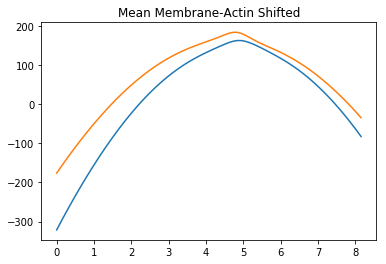

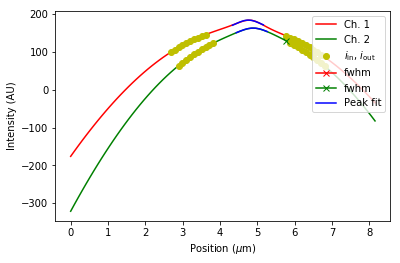

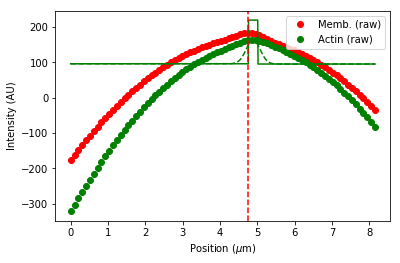

Thickness (nm), center cortex , cortical actin intensity (from fit) 255.2627757937772 4.887771245722054 219.67352931364343


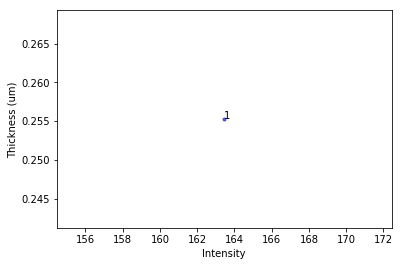

Thickness (min) 255.2627757937772 nm
Thickness (median) 255.2627757937772 nm
Thickness (max) 255.2627757937772 nm
block id 2


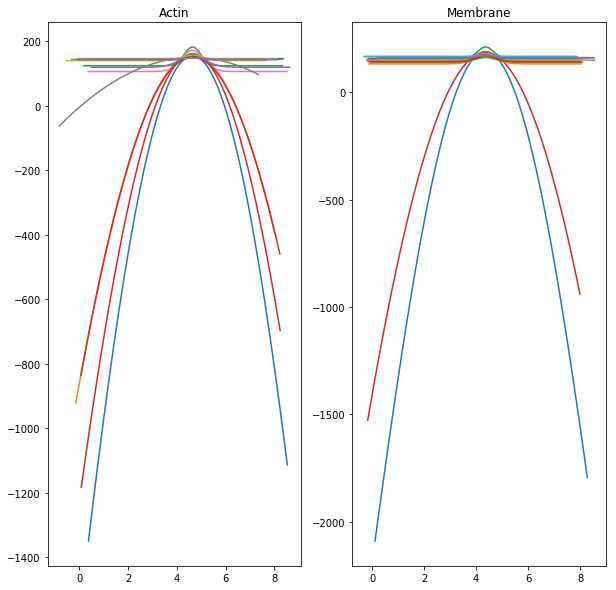

Membrane Fit: (Amp, Sigma, PeakPos, C) [1069.10976304    1.56357436    4.38788869  -99.85417191]
Actin Fit: [ 23.15850344   0.43175103   4.48054851 131.85960715]


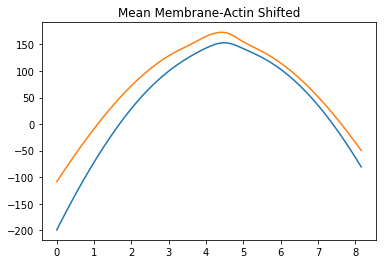

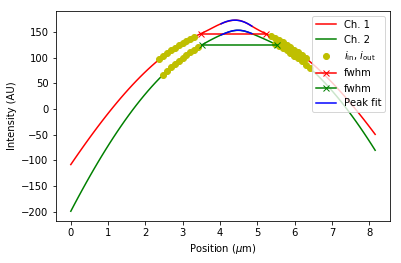

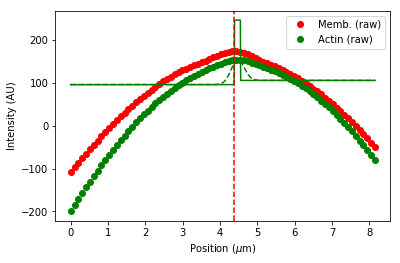

Thickness (nm), center cortex , cortical actin intensity (from fit) 161.13586168006 4.468456619460216 245.45430615045512


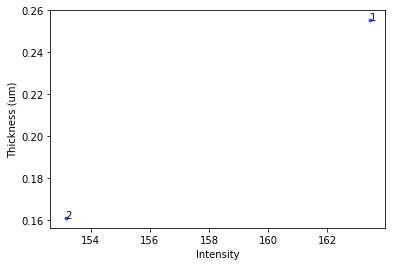

Thickness (min) 161.13586168006 nm
Thickness (median) 208.1993187369186 nm
Thickness (max) 255.2627757937772 nm
block id 3


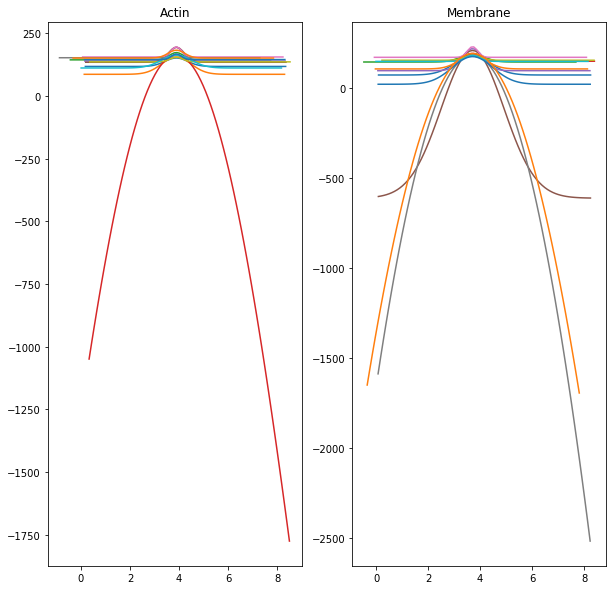

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 61.08451395   0.41038348   3.69175431 124.97410299]
Actin Fit: [ 19.01464119   0.31357384   3.75225478 141.96654696]


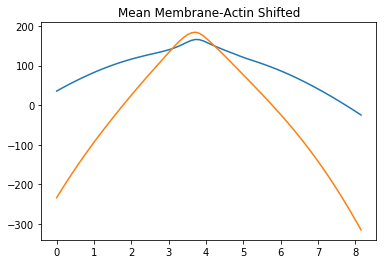

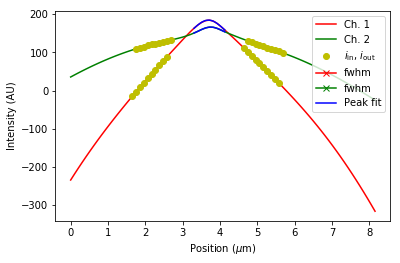

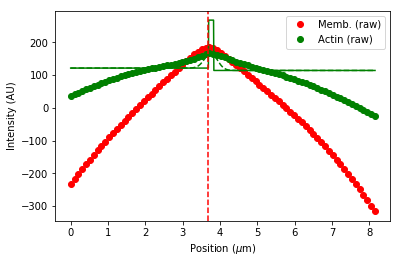

Thickness (nm), center cortex , cortical actin intensity (from fit) 140.8289044428141 3.7621687631282383 267.91725900355283


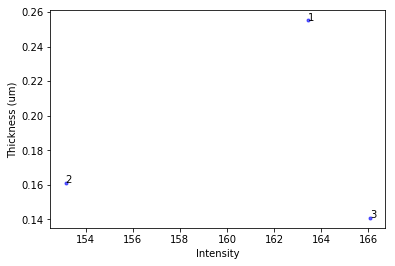

Thickness (min) 140.8289044428141 nm
Thickness (median) 161.13586168006 nm
Thickness (max) 255.2627757937772 nm
block id 4


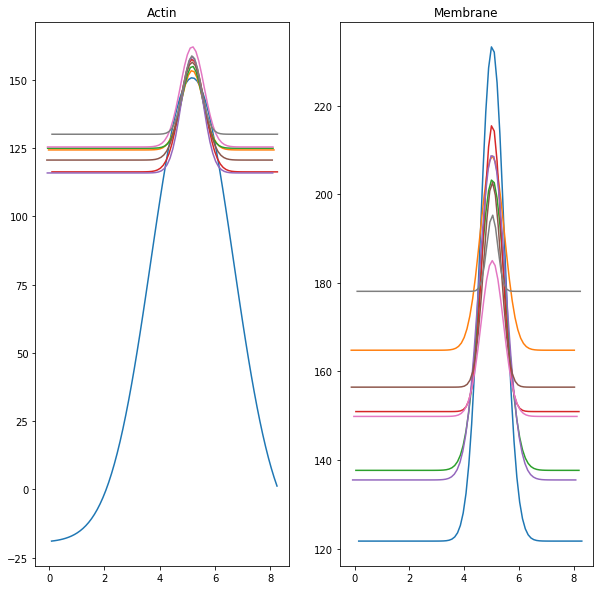

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 47.47167062   0.38283221   5.01522087 155.42161988]
Actin Fit: [ 34.38246497   0.41537271   5.17950124 122.95685582]


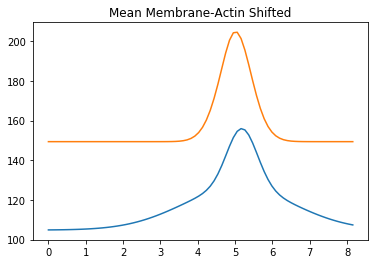

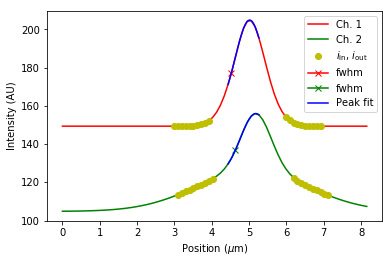

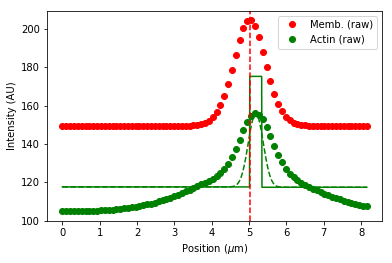

Thickness (nm), center cortex , cortical actin intensity (from fit) 329.0875679190981 5.179764657143839 175.2217738873022


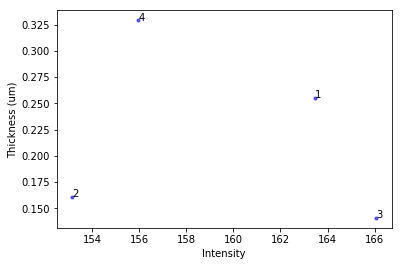

Thickness (min) 140.8289044428141 nm
Thickness (median) 208.1993187369186 nm
Thickness (max) 329.0875679190981 nm
block id 5


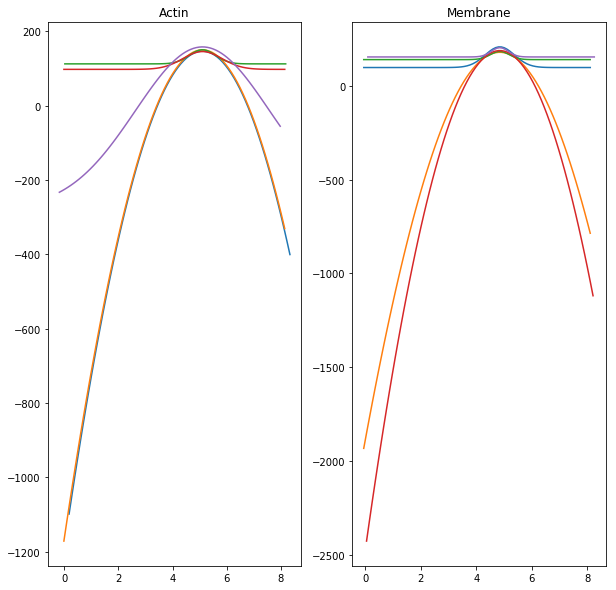

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 75.48491637   0.45236579   4.84563727 124.97471205]
Actin Fit: [172.26638921   0.86519769   5.08905385  70.02856501]


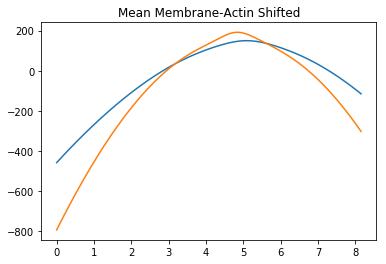

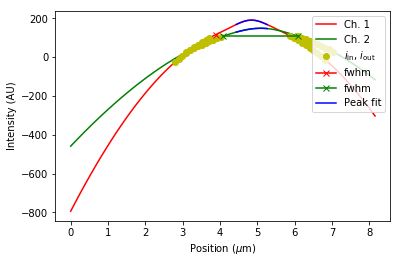

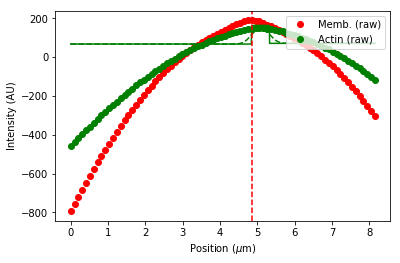

Thickness (nm), center cortex , cortical actin intensity (from fit) 482.27807773282234 5.086776312978498 164.16827438275246


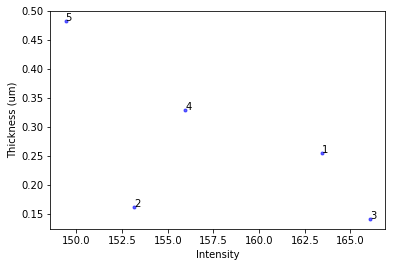

Thickness (min) 140.8289044428141 nm
Thickness (median) 255.2627757937772 nm
Thickness (max) 482.27807773282234 nm
block id 6


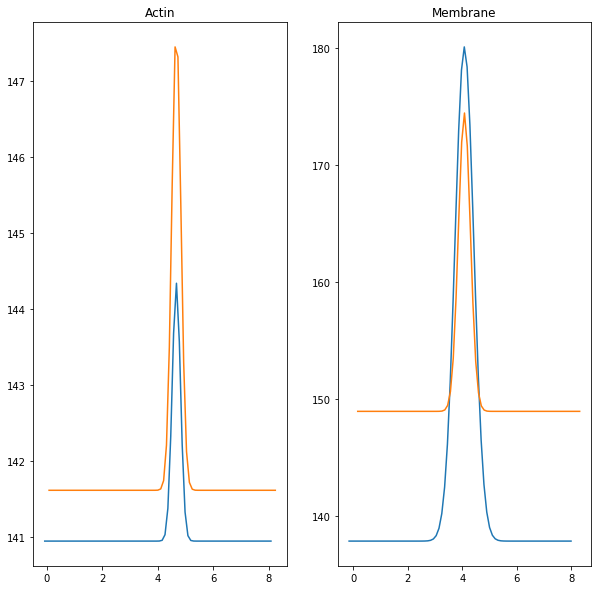

Membrane Fit: (Amp, Sigma, PeakPos, C) [118.06699273   0.61878325   4.09113831  95.95111219]
Actin Fit: [  1.95171134   0.18157714   4.64104447 141.22298392]


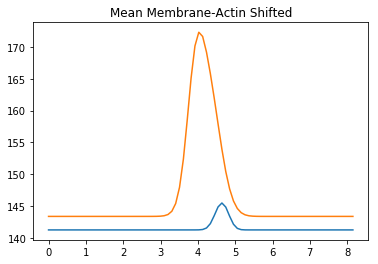

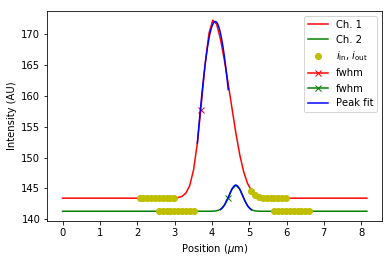

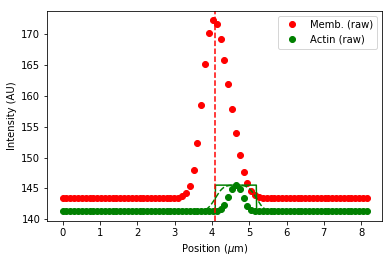

Thickness (nm), center cortex , cortical actin intensity (from fit) 1099.812332610673 4.641044474712656 145.51623878426042


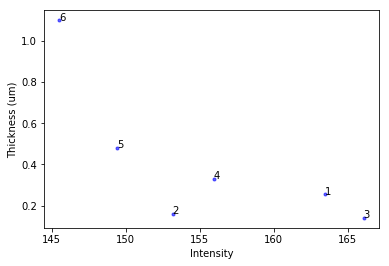

Thickness (min) 140.8289044428141 nm
Thickness (median) 292.17517185643766 nm
Thickness (max) 1099.812332610673 nm
block id 7


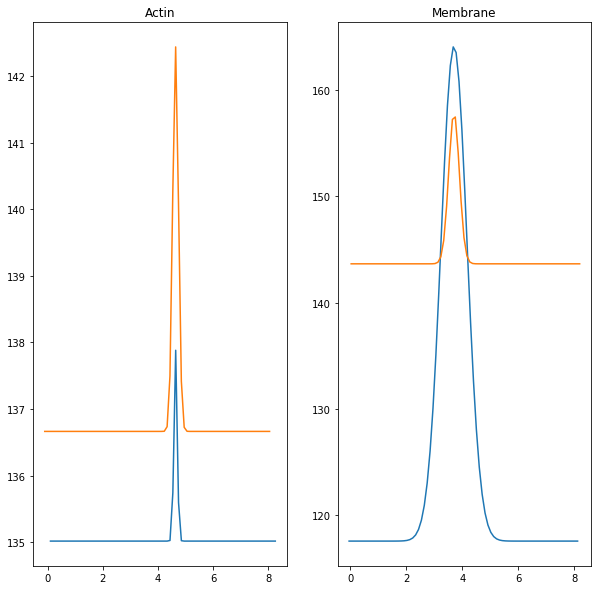

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 13.17574591   0.26704353   3.71271684 141.05815632]
Actin Fit: [  1.10306841   0.15256441   4.7025464  135.69658721]


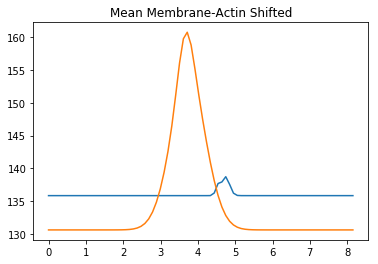

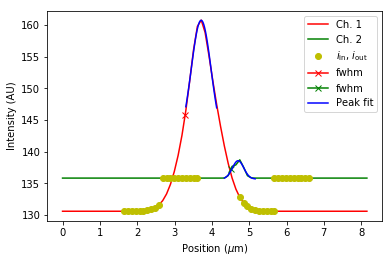

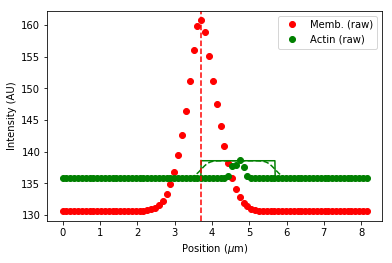

Thickness (nm), center cortex , cortical actin intensity (from fit) 1979.6591255923915 4.7025464004881306 138.58101241777845


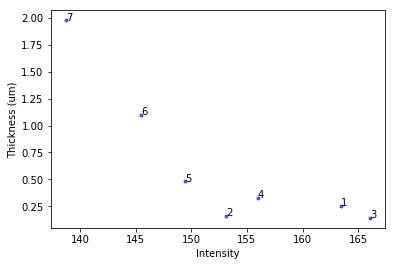

Thickness (min) 140.8289044428141 nm
Thickness (median) 329.0875679190981 nm
Thickness (max) 1979.6591255923915 nm
block id 8


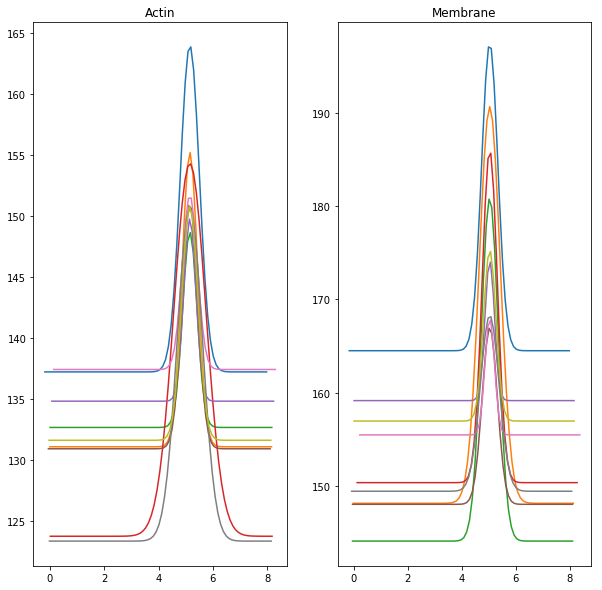

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 18.378683     0.3070672    5.04190022 153.01169323]
Actin Fit: [ 15.05107284   0.31723556   5.15545525 133.24850872]


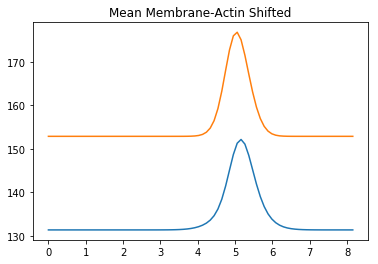

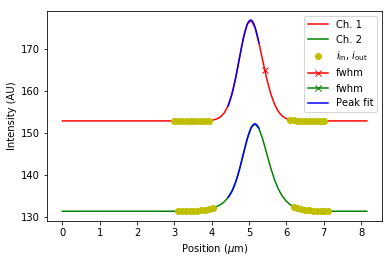

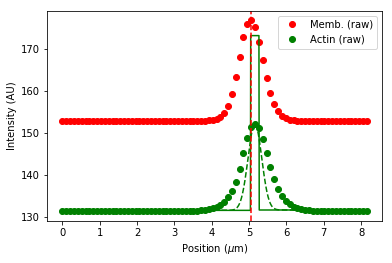

Thickness (nm), center cortex , cortical actin intensity (from fit) 226.59571511929127 5.155198080534161 173.12665872634736


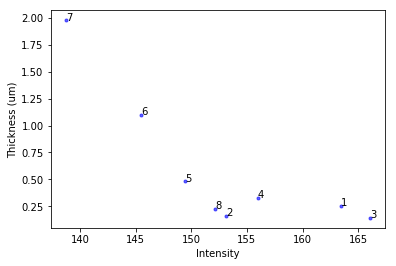

Thickness (min) 140.8289044428141 nm
Thickness (median) 292.17517185643766 nm
Thickness (max) 1979.6591255923915 nm
block id 9


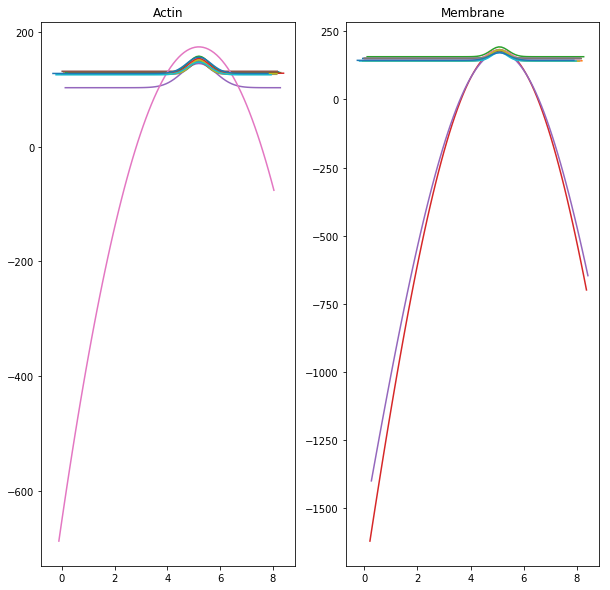

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 25.14381041   0.34770562   5.08828087 148.66161715]
Actin Fit: [ 21.92944381   0.39122717   5.16915276 129.62506714]


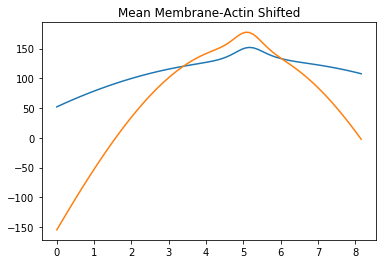

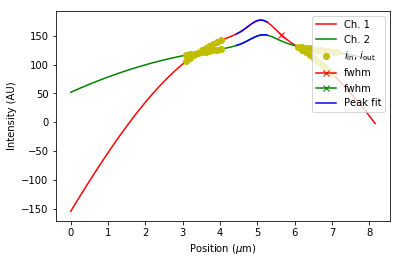

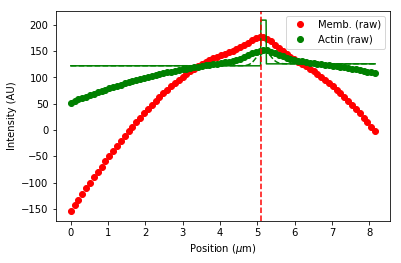

Thickness (nm), center cortex , cortical actin intensity (from fit) 144.2595410074319 5.160410640441037 209.06511014015635


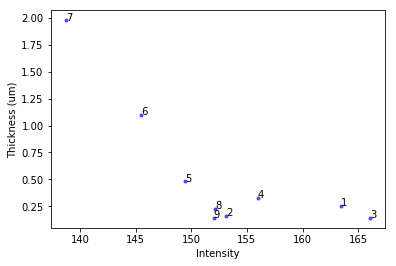

Thickness (min) 140.8289044428141 nm
Thickness (median) 255.2627757937772 nm
Thickness (max) 1979.6591255923915 nm
block id 10


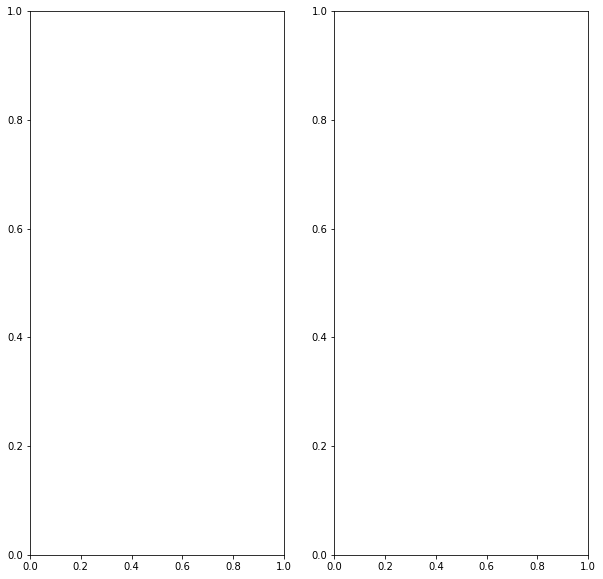

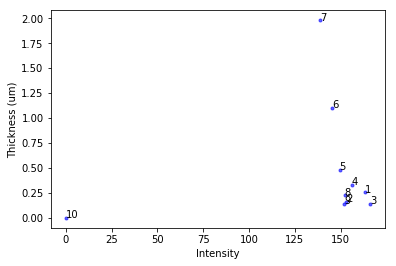

Thickness (min) 0.0 nm
Thickness (median) 240.92924545653423 nm
Thickness (max) 1979.6591255923915 nm
block id 11


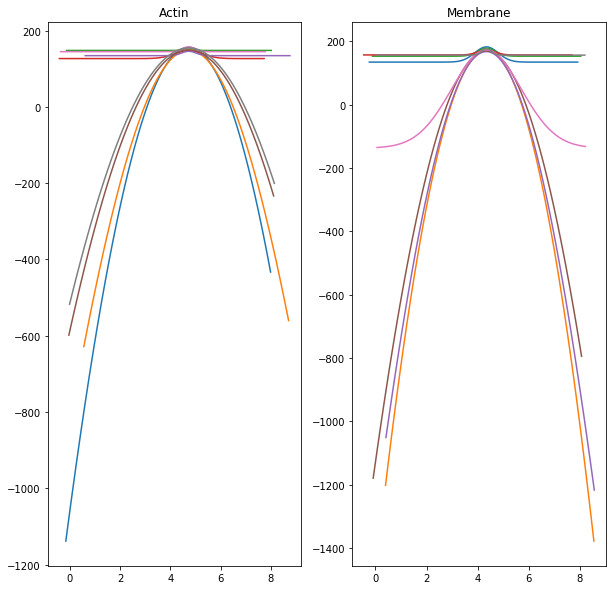

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 963.27117208    1.40093842    4.2753863  -106.4456815 ]
Actin Fit: [ 7.02837767e+05  1.70972574e+01  4.74931854e+00 -1.62527987e+04]


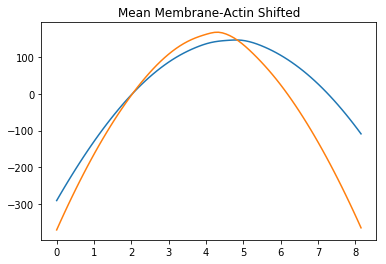

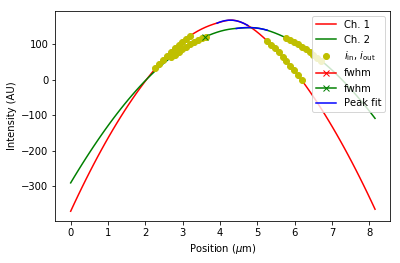

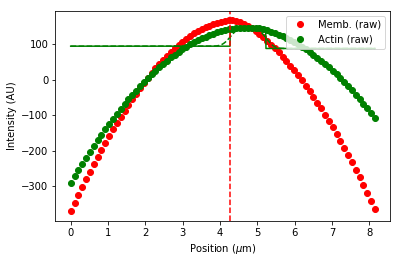

Thickness (nm), center cortex , cortical actin intensity (from fit) 954.8483961367272 4.7528104988686595 147.28558533290305


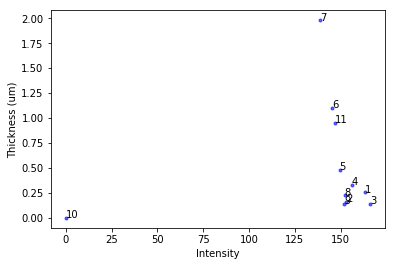

Thickness (min) 0.0 nm
Thickness (median) 255.2627757937772 nm
Thickness (max) 1979.6591255923915 nm
block id 12


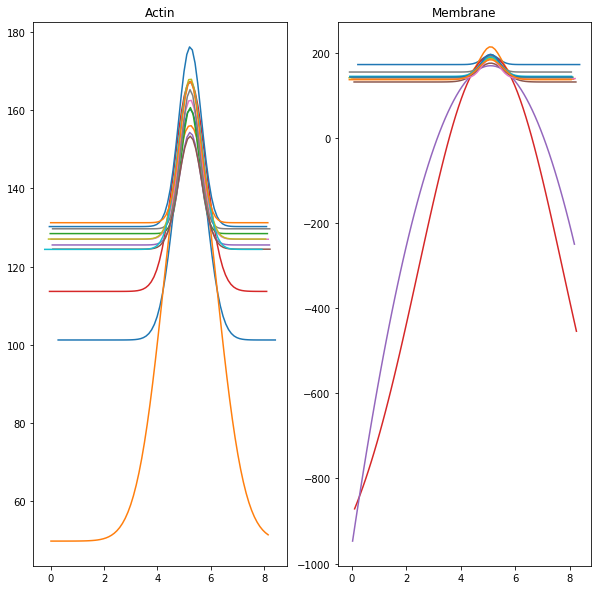

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 44.40565165   0.40172331   5.11138515 143.72890317]
Actin Fit: [ 40.4253756    0.44192963   5.23784996 125.58304373]


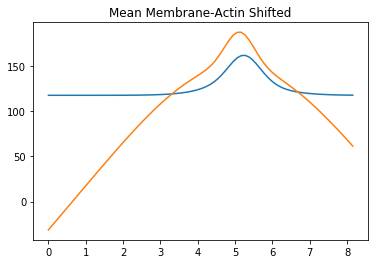

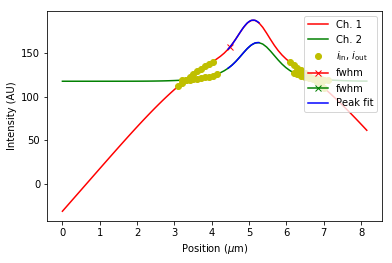

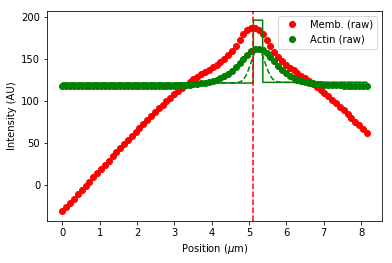

Thickness (nm), center cortex , cortical actin intensity (from fit) 250.57997833882695 5.236675136039292 196.488224763191


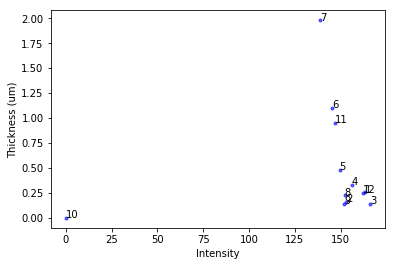

Thickness (min) 0.0 nm
Thickness (median) 252.92137706630209 nm
Thickness (max) 1979.6591255923915 nm
block id 13


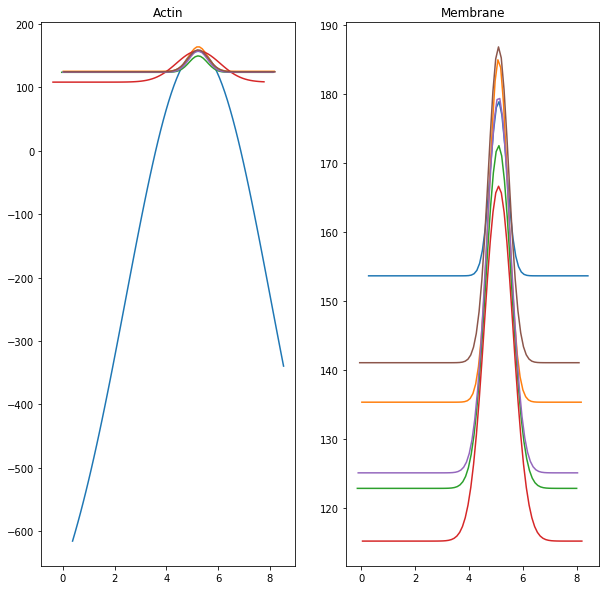

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 48.37006795   0.43457514   5.11324123 131.79595123]
Actin Fit: [ 31.32178609   0.42067118   5.21238594 125.34096239]


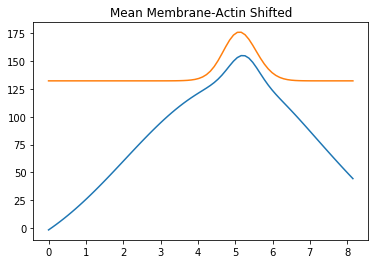

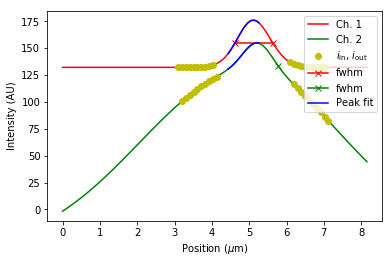

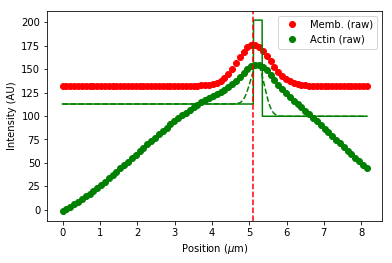

Thickness (nm), center cortex , cortical actin intensity (from fit) 232.22977075530207 5.229356120268069 202.37192235026725


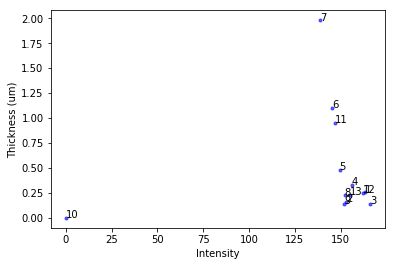

Thickness (min) 0.0 nm
Thickness (median) 250.57997833882695 nm
Thickness (max) 1979.6591255923915 nm
block id 14


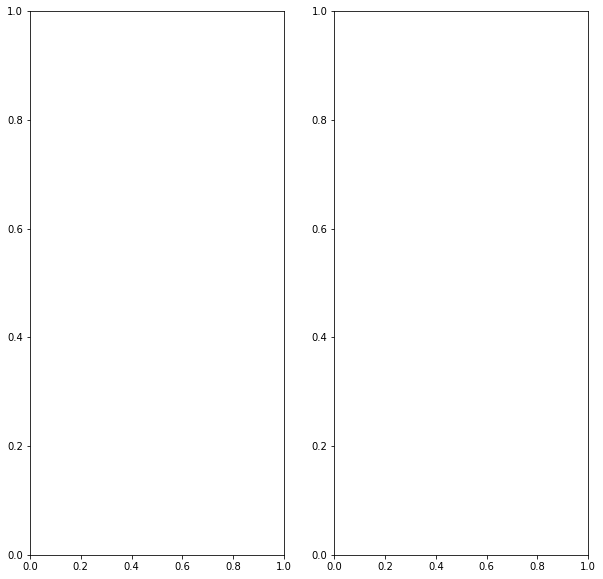

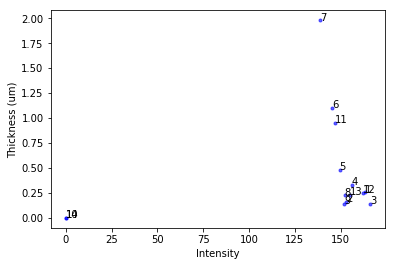

Thickness (min) 0.0 nm
Thickness (median) 241.4048745470645 nm
Thickness (max) 1979.6591255923915 nm
block id 15


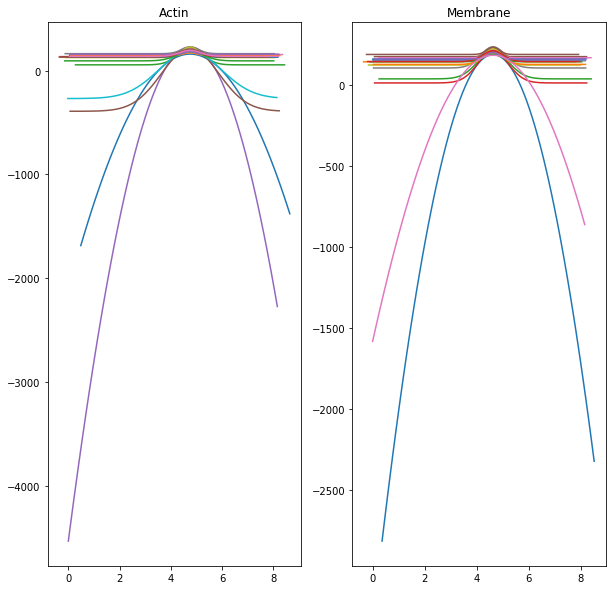

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 70.13670746   0.40542027   4.60944075 136.71517405]
Actin Fit: [ 74.82456927   0.43536331   4.75307354 125.51290126]


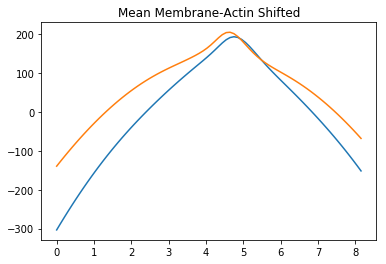

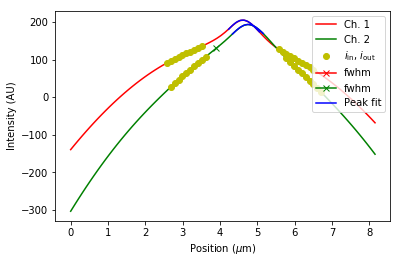

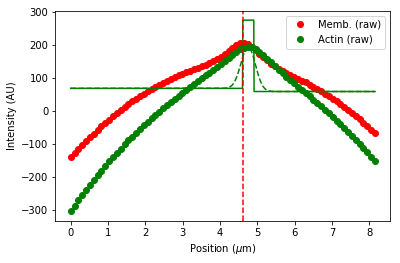

Thickness (nm), center cortex , cortical actin intensity (from fit) 296.14452086379424 4.757513006785484 275.1466310059189


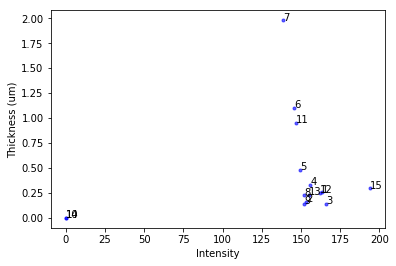

Thickness (min) 0.0 nm
Thickness (median) 250.57997833882695 nm
Thickness (max) 1979.6591255923915 nm
block id 16


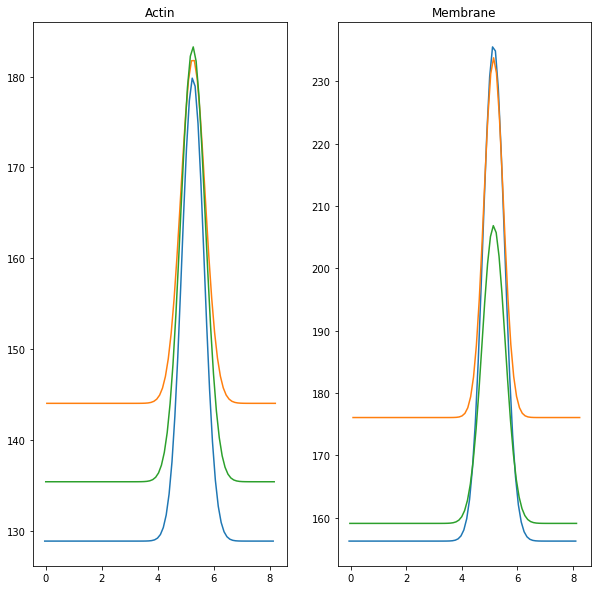

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 58.88517246   0.38392384   5.1412281  163.46765368]
Actin Fit: [ 48.10899929   0.42352391   5.25783276 136.31095403]


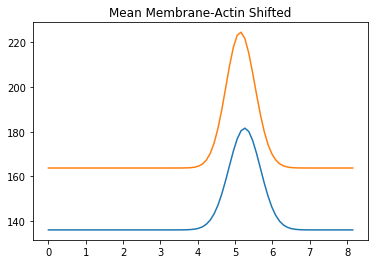

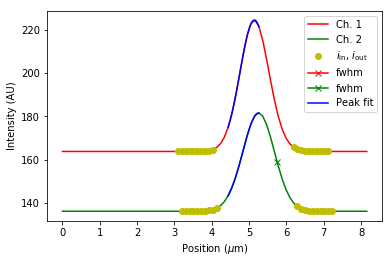

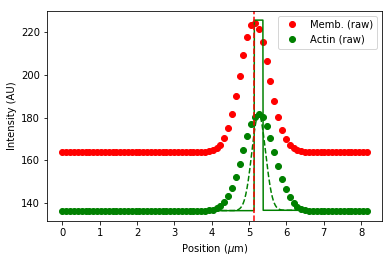

Thickness (nm), center cortex , cortical actin intensity (from fit) 232.7398181936621 5.257598013383521 225.68143674759307


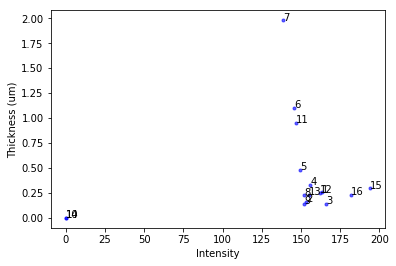

Thickness (min) 0.0 nm
Thickness (median) 241.6598982662445 nm
Thickness (max) 1979.6591255923915 nm
Wall time: 15min 17s


In [6]:
%%time
global Thickness, Intensity, PeakActin, DataActin, PeakMembrane, DataMembrane, Time, ID, BlockAverageActin, BlockAverageMembrane
global Thickness_intensity, Thickness_id
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []

BlockAverageActin = []
BlockAverageMembrane = []
for i in range(0, totallength):
    
 BlockActin = []
 BlockMembrane = []
    
 print('block id', i+1) 
 currentid = i+1
 ID.append(i + 1)
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, BlockActin, PeakMembrane, BlockMembrane, BlockAverageActin,BlockAverageMembrane, Time, 0)
 Correlation_plot(Thickness, Intensity, ID)
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 
 Thickness_id = np.column_stack([Thickness, ID]) 
 

 #clear_output(wait = True)
    


In [7]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_id:
    master_data.append(line)
file =    open(save_dir + "/" + ( "Block" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(file)
writer.writerows(master_data) 
file.close()


X: 158.27881646276083 Y:  0.4846758847276194
Standard deviation: 12701.569234979135
X: 0.0 Y:  0.0
Standard deviation: 12701.569234979135


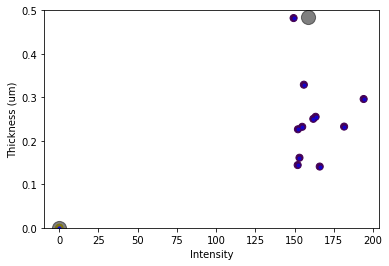

/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


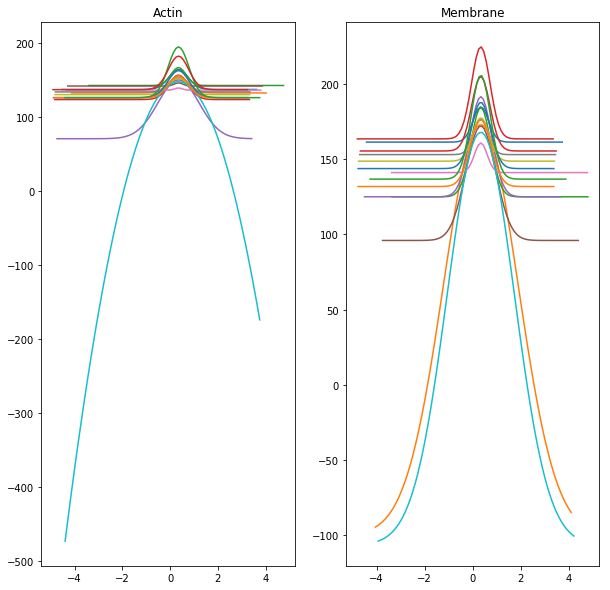

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.90988314e+05  9.01849856e+00  5.29384538e-01 -8.27884394e+03]
Actin Fit: [ 28.33362173   0.51529471   0.51825663 130.90968915]


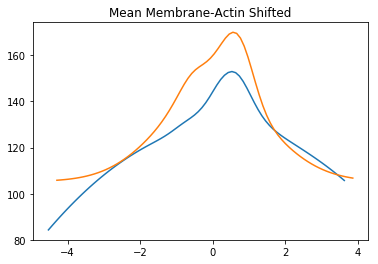

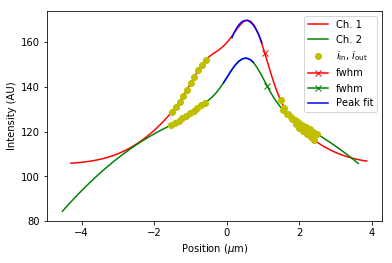

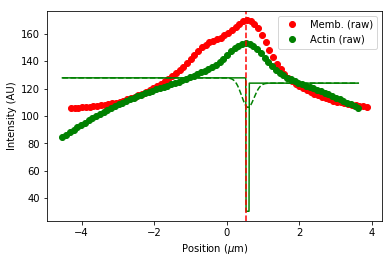

Thickness (nm), center cortex , cortical actin intensity (from fit) 88.13019770520961 0.5734496364431303 30.569128093651923


In [9]:
num_clusters = 2
show_intensity_plot(Thickness_intensity,save_dir,os.path.basename(Actinimage), ymin = 0, ymax = 0.5, num_clusters = num_clusters )



FinalThickness = []
FinalIntensity = []
FinalTime = []
FinalShiftFit(BlockAverageActin, BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,FinalThickness, FinalIntensity,   FinalTime, 0)

Final_master_data= []
Final_Thickness = np.column_stack([FinalThickness, os.path.basename(Actinimage)]) 


for line in Final_Thickness:
    Final_master_data.append(line)
Final_file =    open(save_dir + "/" + ( "Master" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(Final_file)
writer.writerows(Final_master_data) 
Final_file.close()



In [ ]:
hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    
export_png(p, filename=save_dir +  "/" +  'Bokeh_Histogram' + os.path.basename(Actinimage) + '.png')    